In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

z = pd.read_csv('house_price.txt', sep = ',')

In [2]:
z.loc[:, ("y1")] = (z['price'] > z['price'].median()).astype(int)
z = z.drop(['index','price','sq_price'], axis = 1)
z_low = z.loc[z['y1'] == 0][['area','bathrooms','y1']]
z_high = z.loc[z['y1'] == 1][['area','bathrooms','y1']]

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
trainX, testX, trainY, testY = train_test_split(z[['area','bathrooms']], z['y1'], test_size = 0.25, random_state = 33)
ss = StandardScaler()
trainX_std = ss.fit_transform(trainX)
testX_std = ss.transform(testX)


In [4]:
## l2-regularized logistic model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear').fit(trainX_std, trainY)

In [5]:
from sklearn.metrics import confusion_matrix, classification_report
predictY = lr.predict(testX_std)
CFmat = confusion_matrix(y_true = testY, y_pred = predictY)
print(CFmat)
print(classification_report(testY, predictY))

[[7 0]
 [1 4]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.80      0.89         5

    accuracy                           0.92        12
   macro avg       0.94      0.90      0.91        12
weighted avg       0.93      0.92      0.91        12



In [6]:
#Linear SVM
from sklearn.svm import LinearSVC
lsvc = LinearSVC().fit(trainX_std, trainY)
predictY = lsvc.predict(testX_std)
from sklearn.metrics import classification_report
print(classification_report(testY, predictY))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.80      0.89         5

    accuracy                           0.92        12
   macro avg       0.94      0.90      0.91        12
weighted avg       0.93      0.92      0.91        12



In [7]:
#kernel SVM
from sklearn.svm import SVC
ksvm = SVC(kernel = 'rbf', C=1,gamma=0.1).fit(trainX_std,trainY)
predictY2 = ksvm.predict(testX_std)
print(classification_report(testY,predictY2))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.67      0.80      0.73         5

    accuracy                           0.75        12
   macro avg       0.75      0.76      0.75        12
weighted avg       0.76      0.75      0.75        12



Max accuracy: 0.8333333333333334 at k = 3


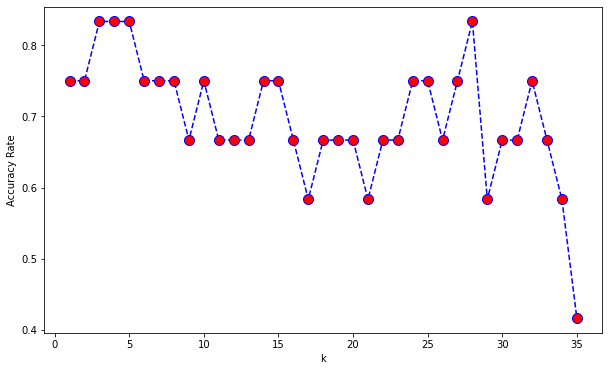

In [8]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracy_rate = []
n_train = len(trainY)
for i in range(1, n_train + 1):
    knn = KNeighborsClassifier(n_neighbors = i).fit(trainX_std, trainY)
    pred_i = knn.predict(testX_std)
    accuracy_rate.append(accuracy_score(testY, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1, n_train+1), accuracy_rate, color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('k')
plt.ylabel('Accuracy Rate')
print('Max accuracy:', max(accuracy_rate), 'at k =', accuracy_rate.index(max(accuracy_rate))+1)

In [9]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier().fit(trainX_std,trainY)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
predictDt = dtree.predict(testX_std)
CFmat = confusion_matrix(y_true = testY, y_pred = predictDt)
print(CFmat)
print(classification_report(testY, predictDt))

[[7 0]
 [2 3]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.60      0.75         5

    accuracy                           0.83        12
   macro avg       0.89      0.80      0.81        12
weighted avg       0.87      0.83      0.82        12



In [13]:
## naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(trainX_std,trainY)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
predictYgnb = gnb.predict(testX_std)
CFmat = confusion_matrix(y_true = testY, y_pred = predictYgnb)
print(CFmat)
print(classification_report(testY,predictYgnb))

[[5 2]
 [2 3]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.60      0.60      0.60         5

    accuracy                           0.67        12
   macro avg       0.66      0.66      0.66        12
weighted avg       0.67      0.67      0.67        12

